# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load The Dataset

In [2]:
data=pd.read_csv("/content/Amazon Sale Report.csv")

/tmp/ipython-input-2214467584.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("/content/Amazon Sale Report.csv")


In [4]:
data.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


# Preprocess The Dataset

In [14]:
data['Date'] = pd.to_datetime(data['Date'])
data['Qty'] = data['Qty'].fillna(data['Qty'].median())
data['Amount'] = data['Amount'].fillna(data['Amount'].median())
data['ship-city'] = data['ship-city'].fillna('Unknown')
data['ship-state'] = data['ship-state'].fillna('Unknown')
data['ship-country'] = data['ship-country'].fillna('Unknown')
data['Price'] = data['Amount'] / data['Qty']
data['Sales'] = data['Qty'] * data['Price']
print(data.head(5))

   index             Order ID       Date                        Status  \
0      0  405-8078784-5731545 2022-04-30                     Cancelled   
1      1  171-9198151-1101146 2022-04-30  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146 2022-04-30                       Shipped   
3      3  403-9615377-8133951 2022-04-30                     Cancelled   
4      4  407-1069790-7240320 2022-04-30                       Shipped   

  Fulfilment Sales Channel  ship-service-level    Style              SKU  \
0   Merchant      Amazon.in           Standard   SET389   SET389-KR-NP-S   
1   Merchant      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
2     Amazon      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
3   Merchant      Amazon.in           Standard    J0341       J0341-DR-L   
4     Amazon      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   

        Category  ...    ship-city   ship-state ship-postal-code  \
0            Set  ...       MU

# Aggregate Monthly Sales

In [16]:
data['Month'] = data['Date'].dt.to_period('M')
monthly_sales = data.groupby('Month')['Sales'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].dt.to_timestamp()

print(monthly_sales.head())


       Month       Sales
0 2022-03-01     98261.0
1 2022-04-01  27613916.0
2 2022-05-01  25144286.0
3 2022-06-01  22621063.0


# Visualize Sales Trend

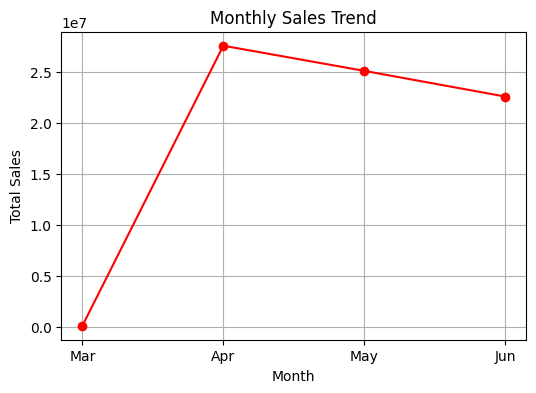

In [22]:
monthly_sales['Month_Name'] = monthly_sales['Month'].dt.strftime('%b')  # Jan, Feb, Mar...
plt.figure(figsize=(6,4))
plt.plot(monthly_sales['Month_Name'], monthly_sales['Sales'], marker='o', color='Red')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()



# Fit linear regression model

In [26]:
import statsmodels.api as sm

monthly_sales['Time'] = np.arange(len(monthly_sales))

# Fit linear regression model
X = sm.add_constant(monthly_sales['Time'])
model = sm.OLS(monthly_sales['Sales'], X).fit()
next_time = len(monthly_sales)
next_month_sales = model.predict([1, next_time])[0]
print(f"Predicted sales for next month: {next_month_sales:.2f}")


Predicted sales for next month: 35144075.50


# Commulative Sales Over Time

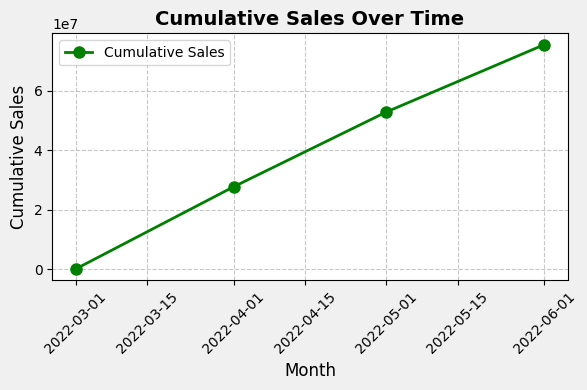

In [35]:
plt.figure(figsize=(6,4), facecolor='#f0f0f0')  # Light grey background
plt.plot(
    monthly_sales['Month'],
    monthly_sales['Cumulative_Sales'],
    color='green',
    marker='o',
    markersize=8,
    linewidth=2,
    label='Cumulative Sales'
)
plt.title('Cumulative Sales Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Cumulative Sales', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


# Top 5 Products

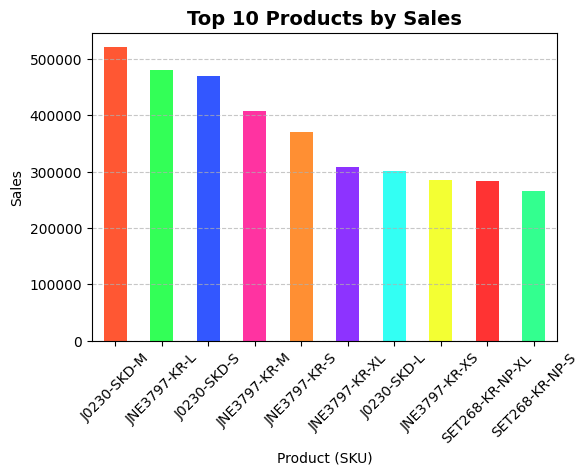

In [47]:
top_products = data.groupby('SKU')['Sales'].sum().sort_values(ascending=False).head(10)
colors = ['#FF5733', '#33FF57', '#3357FF', '#FF33A1', '#FF8F33', '#8D33FF', '#33FFF3', '#F3FF33', '#FF3333', '#33FF8F']
plt.figure(figsize=(6,4))
top_products.plot(kind='bar', color=colors)
plt.title('Top 10 Products by Sales', fontsize=14, fontweight='bold')
plt.ylabel('Sales')
plt.xlabel('Product (SKU)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Monthly Sales Performance and Moving Average

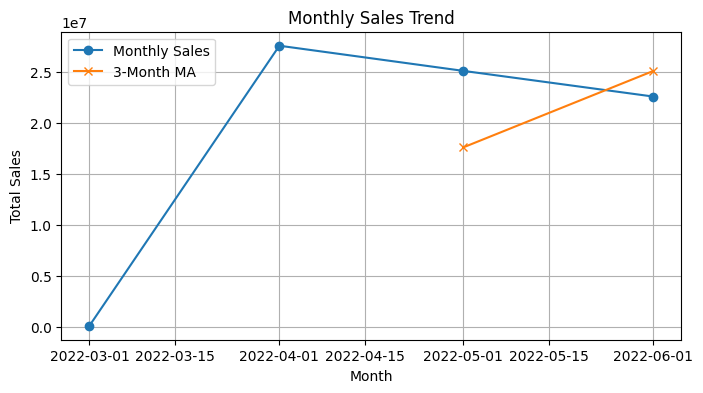

In [52]:
monthly_sales['MA_3'] = monthly_sales['Sales'].rolling(window=3).mean()
plt.figure(figsize=(8,4))
plt.plot(monthly_sales['Month'], monthly_sales['Sales'], marker='o', label='Monthly Sales')
plt.plot(monthly_sales['Month'], monthly_sales['MA_3'], marker='x', label='3-Month MA')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()